In [2]:
from configs.RecursiveVPSDE.recursive_LSTM_fOU_T256_H05_tl_5data import get_config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyarrow.parquet import ParquetFile
import pyarrow as pa

In [15]:
config = get_config()
# Now plot Hurst histogram for the generated samples
train_epoch = 2920
score_error_path = (config.experiment_path.replace("results/",
                                                   "results/score_errors/") + "_NEp{}".format(
    train_epoch).replace(
    ".", "") + ".parquet.gzip").replace("rec_TSM_False_incs_True_unitIntv_", "")
pf = ParquetFile(score_error_path.replace(".parquet.gzip", "_bad1.parquet.gzip"))
first_ten_rows = next(pf.iter_batches(batch_size = config.max_diff_steps*10))
bad_score_df_1 = pa.Table.from_batches([first_ten_rows]).to_pandas()
#bad_score_df_1 = pd.read_parquet(score_error_path.replace(".parquet.gzip", "_bad1.parquet.gzip"),
#                                 engine="pyarrow")
#bad_score_df_1 = pd.read_parquet(score_error_path.replace(".parquet.gzip", "_bad1.parquet.gzip"),
#                                 engine="pyarrow")
#good_score_df = pd.read_parquet(score_error_path.replace(".parquet.gzip", "_good.parquet.gzip"),
#                                engine="pyarrow")
bad_score_1= bad_score_df_1.to_numpy().reshape((bad_score_df_1.index.levshape[0], bad_score_df_1.index.levshape[1], bad_score_df_1.shape[1]))

In [16]:
bad_score_df_1

0             1         2             11            12    \
0 0     6.038062e-02  2.177177e-01  0.447562  3.172695e-02  1.449159e-01   
  1     6.006023e-02  2.012230e-01  0.415310  3.258646e-02  1.386117e-01   
  2     5.587104e-02  1.774085e-01  0.383337  3.209903e-02  1.272376e-01   
  3     4.522867e-02  1.675537e-01  0.353834  2.810788e-02  1.353503e-01   
  4     4.324642e-02  1.566906e-01  0.325946  2.319627e-02  1.328151e-01   
...              ...           ...       ...           ...           ...   
9 9995  1.161591e-06  2.476099e-10  0.000003  7.695348e-09  3.553069e-07   
  9996  7.936155e-07  1.250334e-08  0.000003  8.089817e-09  3.571212e-07   
  9997  9.181554e-07  5.930417e-09  0.000003  1.538197e-07  3.581549e-07   
  9998  9.011013e-07  4.627367e-08  0.000004  4.141104e-07  3.036505e-07   
  9999  9.825275e-07  1.877752e-08  0.000004  6.375742e-07  8.605085e-08   

                22        26            29            31            33    ...  \
0 0     8.274643e+00  0.023907  8.414257e-02  3.230497e-01  5.837717e-01  ...   
  1     7.691448e+00  0.021540  7.454918e-02  4.000510e-01  5.323898e-01  ...   
  2     7.159683e+00  0.019939  7.316467e-02  4.307191e-01  4.980204e-01  ...   
  3     6.456276e+00  0.035930  7.133189e-02  3.986239e-01  4.606459e-01  ...   
  4     5.883045e+00  0.025670  6.249762e-02  4.065191e-01  4.176881e-01  ...   
...              ...       ...           ...           ...           ...  ...   
9 9995  1.418245e-08  0.000003  7.660394e-08  5.131469e-08  4.017950e-07  ...   
  9996  2.890342e-07  0.000003  3.651634e-08  8.185452e-08  5.899303e-07  ...   
  9997  2.377351e-07  0.000003  2.977538e-10  1.049202e-08  8.950305e-08  ...   
  9998  2.422317e-07  0.000003  6.769065e-10  1.464985e-07  2.916678e-07  ...   
  9999  3.594759e-07  0.000003  9.024461e-10  9.676867e-08  1.129309e-06  ...   

                4963      4965      4966          4968          4970  \
0 0     6.966022e-02  0.623960  0.214627  1.046508e-01  1.326733e-01   
  1     6.267608e-02  0.570721  0.203071  9.786975e-02  1.423569e-01   
  2     5.600074e-02  0.508626  0.194797  9.100426e-02  1.789567e-01   
  3     5.191973e-02  0.457392  0.197951  8.484503e-02  1.706731e-01   
  4     5.231271e-02  0.431378  0.184472  7.925184e-02  1.590231e-01   
...              ...       ...       ...           ...           ...   
9 9995  3.576913e-07  0.000009  0.000004  1.174616e-11  1.178705e-07   
  9996  3.681762e-07  0.000012  0.000006  7.870978e-07  1.029076e-07   
  9997  8.366630e-07  0.000015  0.000006  6.943864e-08  7.804590e-08   
  9998  2.075334e-07  0.000010  0.000007  5.524059e-07  8.274368e-08   
  9999  2.930375e-07  0.000005  0.000007  4.791253e-07  1.423533e-07   

            4975          4977      4987      4991          4993  
0 0     0.324026  4.492938e-01  0.000442  0.066937  2.652479e-01  
  1     0.307209  4.263939e-01  0.000506  0.061079  2.493386e-01  
  2     0.281451  3.906417e-01  0.000420  0.052127  2.317033e-01  
  3     0.275817  3.524802e-01  0.000471  0.055739  2.201076e-01  
  4     0.252390  3.287684e-01  0.000606  0.052912  2.065184e-01  
...          ...           ...       ...       ...           ...  
9 9995  0.000003  1.307827e-06  0.000002  0.000035  2.205756e-07  
  9996  0.000004  1.427098e-06  0.000004  0.000034  4.010872e-10  
  9997  0.000002  7.760846e-09  0.000004  0.000033  3.240164e-07  
  9998  0.000001  1.028303e-06  0.000006  0.000035  1.946518e-07  
  9999  0.000001  1.379940e-06  0.000005  0.000038  4.486816e-07  

[100000 rows x 1400 columns]

In [17]:
# Compute score variance across diffusion times
var_score = np.power(bad_score_1,2).mean(axis=-1).mean(axis=0)
avg_bad_score_1  = np.mean(bad_score_1,axis=-1)

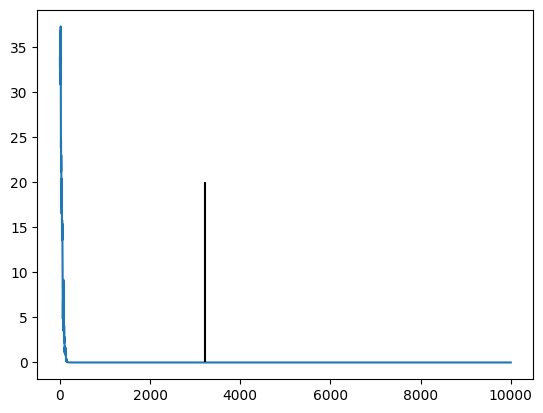

In [26]:
# Plot score variance across diffusion times
plt.plot(np.arange(0, config.max_diff_steps), var_score)
plt.vlines(x=0.322*10000,ymin=0, ymax=20, color="black")
plt.show()

In [19]:
avg_bad_score_1

array([[2.5836179e-01, 2.4181135e-01, 2.2672537e-01, ..., 5.7333882e-06,
        5.8369578e-06, 5.7991283e-06],
       [2.7559951e-01, 2.6004642e-01, 2.4507175e-01, ..., 6.3667958e-06,
        6.2378285e-06, 6.1202400e-06],
       [7.2903109e-01, 7.1023816e-01, 6.8994558e-01, ..., 5.8357014e-06,
        5.7568495e-06, 5.7332263e-06],
       ...,
       [3.9535478e-01, 3.7974483e-01, 3.6804146e-01, ..., 5.5036126e-06,
        5.4858647e-06, 5.5306923e-06],
       [3.5177630e-01, 3.3524546e-01, 3.2017675e-01, ..., 6.1459496e-06,
        6.1370260e-06, 6.1549863e-06],
       [3.5229257e-01, 3.3452597e-01, 3.1713182e-01, ..., 5.7556440e-06,
        5.7889979e-06, 5.8405226e-06]], dtype=float32)

In [20]:
timeav_bad_score_1 = np.mean(avg_bad_score_1,axis=0)

In [21]:
timeav_bad_score_1

array([3.7875503e-01, 3.6259118e-01, 3.4671918e-01, ..., 5.8830333e-06,
       5.8630076e-06, 5.8546107e-06], dtype=float32)

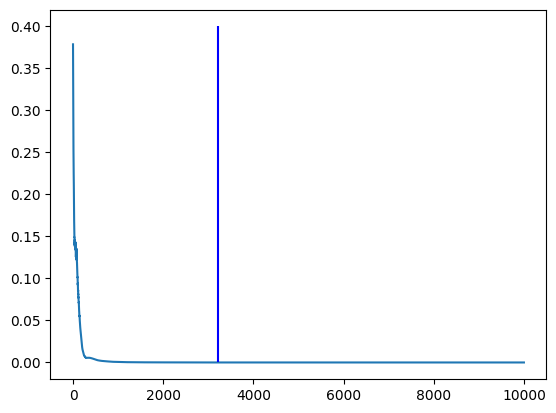

In [23]:
plt.plot(np.linspace(0, config.max_diff_steps, config.max_diff_steps), timeav_bad_score_1)
plt.vlines(x=0.322*10000,ymin=0, ymax=0.4, color="blue")
plt.show()